In [1]:
# py27 compatability
from __future__ import print_function
from __future__ import division
# load packages
import numpy as np                                          # advanced array functions
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # plotting
# configure matplotlib
%matplotlib inline
import seaborn as sns                                       # statistics / plotting
sns.set(style="ticks", font_scale=1.25)
import sspals
from mc_positronium import *

## Monte-Carlo simulation of Ps conversion

In [2]:
# simulate Ps converter
sim1 = Ps_converter(1e5, T=1200)

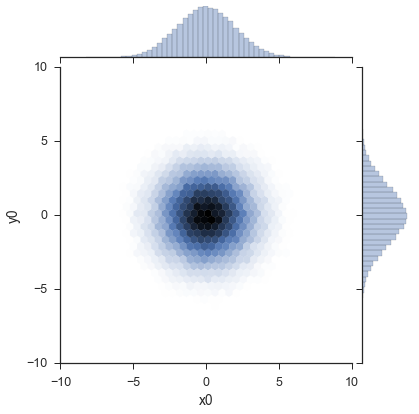

In [3]:
# initial position [mm]
sns.jointplot(sim1["x0"]*1e3, sim1["y0"]*1e3, kind="hex", gridsize=36, mincnt=10, stat_func=None);
plt.show()

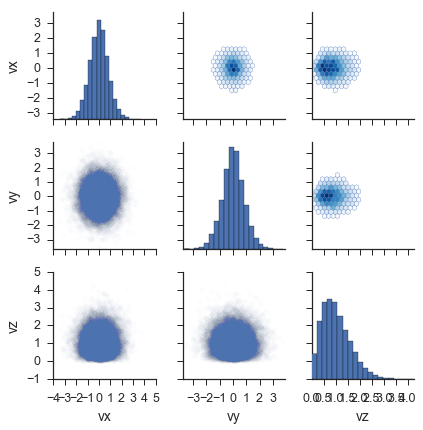

In [4]:
# velocity distribution [(1e5) m s^-1]
g = sns.PairGrid(sim1[sim1.status == 'oPs'][['vx', 'vy', 'vz']] *1e-5)
g = g.map_diag(plt.hist, bins=20)
g = g.map_lower(plt.scatter, alpha=0.01, marker='o', rasterized=True)
g = g.map_upper(plt.hexbin, gridsize=24, cmap='Blues', mincnt=100, linewidths=None, edgecolors='none')
g.fig.set_size_inches((6, 6))

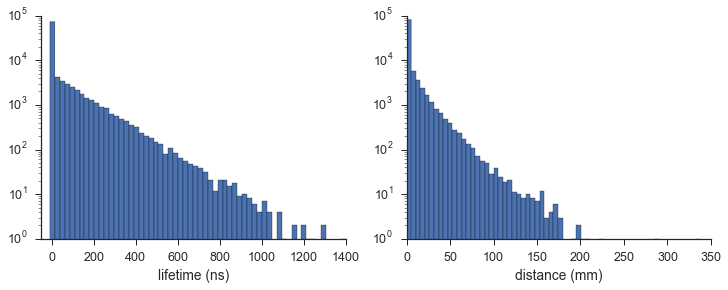

In [5]:
# annihlation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# lifetime
ax[0].hist(sim1['time of death'] * 1e9, bins=64)
ax[0].set_yscale('log')
ax[0].set_xlabel('lifetime (ns)')
ax[0].set_xlim(-50, 1400)
# distance travelled
ax[1].hist(sim1['z'] * 1e3, bins=64)
ax[1].set_yscale('log')
ax[1].set_xlabel('distance (mm)')
sns.despine()
plt.show()

# Simulate detector output

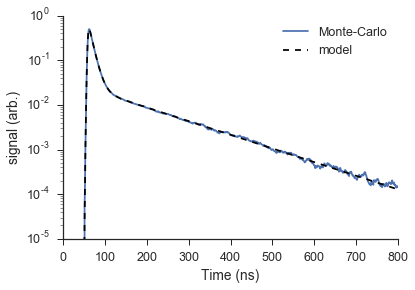

In [6]:
# convolve
dt = 1e-9
bins = np.arange(-5e-8, 8e-7, dt)
pwo = detector(np.arange(-1e-8, 2e-7, 1e-9), 1e-8)
lifetime = np.histogram(sim1['time of death'].values, bins=bins, density=False)[0]
spectra = np.convolve(lifetime, pwo)
x_vals = np.arange(len(spectra)) * dt

# plotting
fig, ax = plt.subplots(figsize=(6, 4))

#spectra
ax.plot(x_vals * 1e9, 0.5*spectra / max(spectra), label='Monte-Carlo')

# model
sim = sspals.sim(x_vals-5.9e-8, amp=0.5)
ax.plot(x_vals * 1e9, 0.5*sim/max(sim), ls='--', c='k', label='model')

# format
ax.legend(loc=0)
ax.set_yscale('log')
ax.set_ylabel("signal (arb.)")
ax.set_xlabel("Time (ns)")
ax.set_ylim(1e-5, 1)
ax.set_xlim(0, 800)
sns.despine()

#output
plt.show()